In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [31]:
data_afsnt = pd.read_csv('./data/AFSNT.csv')
data_sfsnt = pd.read_csv('./data/SFSNT.csv')
data_afsnt_dly = pd.read_csv('./data/AFSNT_DLY.csv')

In [32]:
data_afsnt['NUM'] = data_afsnt['DLY'].apply(lambda x : 0 if x == 'N' else 1)

In [33]:
data_afsnt.head(3)

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,IRR,STT,ATT,DLY,DRR,CNL,CNR,NUM
0,2017,1,1,일,ARP3,ARP6,J,J1955,SEw3NzE4,D,N,10:05,10:32,N,NaN,N,NaN,0
1,2017,1,1,일,ARP3,ARP6,J,J1954,SEw3NzE4,A,N,9:30,9:31,N,NaN,N,NaN,0
2,2017,1,1,일,ARP3,ARP6,J,J1956,SEw3NzE4,A,N,12:45,13:03,N,NaN,N,NaN,0


In [34]:
data_afsnt_dly.head(3)

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,AOD,STT,DLY,DLY_RATE
0,2019,9,16,월,ARP1,ARP3,L,L1702,A,9:05,NaN,NaN
1,2019,9,16,월,ARP3,ARP1,L,L1702,D,7:55,NaN,NaN
2,2019,9,16,월,ARP1,ARP3,L,L1720,A,14:40,NaN,NaN


In [35]:
sta_list = list(data_sfsnt[data_sfsnt['STA'].isna()==True].index)
std_list = list(data_sfsnt[data_sfsnt['STD'].isna()==True].index)
all_list = []
for i,j in zip(sta_list,std_list):
    all_list.append(i)
    all_list.append(j)
all_list = list(set(all_list))
data_sfsnt.drop(all_list,axis=0,inplace=True)

In [36]:
# data_sfsnt['STA'] = data_sfsnt['STA'].fillna()
data_sfsnt.info()
data_afsnt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1150 entries, 0 to 1185
Data columns (total 17 columns):
SSC    1150 non-null object
FLT    1150 non-null object
ORG    1150 non-null object
DES    1150 non-null object
STD    1150 non-null object
STA    1150 non-null object
FLO    1150 non-null object
MON    728 non-null object
TUE    719 non-null object
WED    718 non-null object
THU    715 non-null object
FRI    722 non-null object
SAT    721 non-null object
SUN    701 non-null object
FSD    1150 non-null int64
FED    1150 non-null int64
IRR    1150 non-null object
dtypes: int64(2), object(15)
memory usage: 161.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987709 entries, 0 to 987708
Data columns (total 18 columns):
SDT_YY    987709 non-null int64
SDT_MM    987709 non-null int64
SDT_DD    987709 non-null int64
SDT_DY    987709 non-null object
ARP       987709 non-null object
ODP       987709 non-null object
FLO       987709 non-null object
FLT       987709 non-null object
R

In [37]:
data_afsnt['HOUR'] = data_afsnt['STT'].apply(lambda x : int(x.split(':')[0]))
data_afsnt['GROUP'] = [sorted([i,j])[0] + sorted([i,j])[1] for i,j in zip(data_afsnt['ARP'], data_afsnt['ODP'])]
data_afsnt_dly['GROUP'] = [sorted([i,j])[0] + sorted([i,j])[1] for i,j in zip(data_afsnt_dly['ARP'], data_afsnt_dly['ODP'])]
data_sfsnt['GROUP'] = [sorted([i,j])[0] + sorted([i,j])[1] for i,j in zip(data_sfsnt['ORG'], data_sfsnt['DES'])]
data_afsnt['MINUTE'] = data_afsnt['STT'].apply(lambda x : int(x.split(':')[1]))

data_sfsnt['STD_HOUR'] = data_sfsnt['STD'].apply(lambda x : int(x.split(':')[0]))
data_sfsnt['STD_MINUTE'] = data_sfsnt['STD'].apply(lambda x : int(x.split(':')[1]))
data_sfsnt['STA_HOUR'] = data_sfsnt['STA'].apply(lambda x : int(x.split(':')[0]))
data_sfsnt['STA_MINUTE'] = data_sfsnt['STA'].apply(lambda x : int(x.split(':')[1]))
data_sfsnt['DISTANCE'] = (data_sfsnt['STA_HOUR'] - data_sfsnt['STD_HOUR']) * 60 + data_sfsnt['STA_MINUTE'] - data_sfsnt['STD_MINUTE']

In [38]:
data_afsnt.sort_values(['SDT_YY','SDT_MM','SDT_DD','REG','HOUR','MINUTE']).groupby('REG')['FLT'].value_counts().head(10)

REG       FLT   
QjUwMDE2  K1606D      2
QjY3Mzc=  E1665A      1
SEw3MjA3  J1208       2
          J1213       2
          J1455       1
          J1456       1
SEw3MjAw  J1608     130
          J1609     130
          J1255     122
          J1606     110
Name: FLT, dtype: int64

In [39]:
def plus_zero(time):
    if time < 10:
        time = '0'+str(time)
    
    return time

data_afsnt['DATE'] = [str(i)+str(j)+str(k) for i,j,k in zip(data_afsnt['SDT_YY'],data_afsnt['SDT_MM'], data_afsnt['SDT_DD'])]

In [40]:
data_afsnt.tail(3)

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,...,ATT,DLY,DRR,CNL,CNR,NUM,HOUR,GROUP,MINUTE,DATE
987706,2019,6,30,일,ARP3,ARP4,L,L1801,SEw4MzYz,A,...,7:10,N,NaN,N,NaN,0,7,ARP3ARP4,20,2019630
987707,2019,6,30,일,ARP3,ARP4,L,L1807,SEw4MjM3,A,...,17:32,N,NaN,N,NaN,0,17,ARP3ARP4,30,2019630
987708,2019,6,30,일,ARP3,ARP4,L,L1804,SEw4MjM3,D,...,14:54,N,NaN,N,NaN,0,14,ARP3ARP4,45,2019630


In [41]:
data_sfsnt.head(3)

,SSC,FLT,ORG,DES,STD,STA,FLO,MON,TUE,WED,...,SUN,FSD,FED,IRR,GROUP,STD_HOUR,STD_MINUTE,STA_HOUR,STA_MINUTE,DISTANCE
0,S19,A1915,ARP1,ARP3,7:55,9:05,A,Y,Y,Y,...,Y,20190331,20191026,N,ARP1ARP3,7,55,9,5,70
1,S19,A1904,ARP3,ARP1,7:55,9:05,A,Y,Y,Y,...,Y,20190331,20191026,N,ARP1ARP3,7,55,9,5,70
2,S19,I1304,ARP3,ARP1,8:00,9:15,I,Y,NaN,Y,...,Y,20190331,20191026,N,ARP1ARP3,8,0,9,15,75


In [42]:
def change_dy(dy):
    if dy == '월':
        dy = 'MON'
    elif dy == '화':
        dy = 'TUE'
    elif dy == '수':
        dy = 'WED'
    elif dy == '목':
        dy = 'TUR'
    elif dy == '금':
        dy = 'FRI'
    elif dy == '토':
        dy = 'SAT'
    else:
        dy = 'SUN'
    return dy

data_afsnt['SDT_DY'] = data_afsnt['SDT_DY'].apply(lambda x : change_dy(x))
data_afsnt_dly['SDT_DY'] = data_afsnt_dly['SDT_DY'].apply(lambda x : change_dy(x))

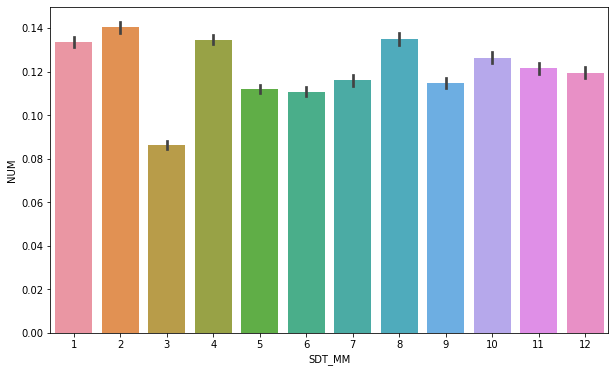

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(data=data_afsnt,x='SDT_MM',y='NUM')

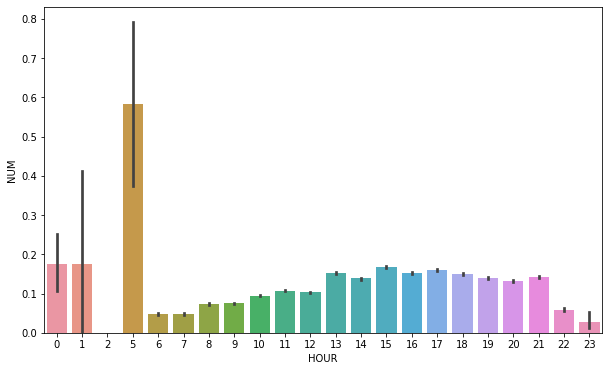

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(data=data_afsnt,x='HOUR',y='NUM')

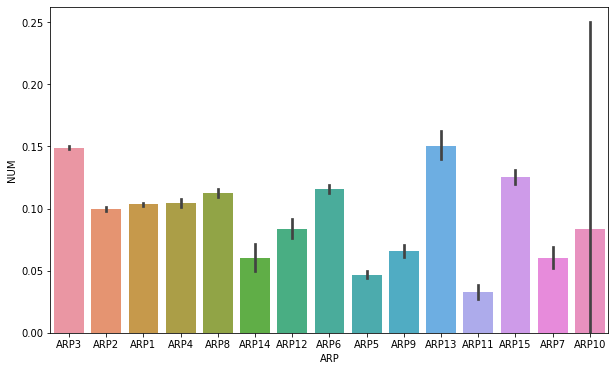

In [45]:
plt.figure(figsize=(10,6))
sns.barplot(data=data_afsnt,x='ARP',y='NUM')

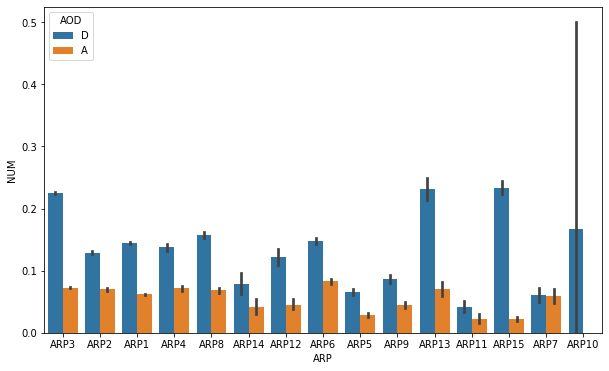

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(data=data_afsnt,x='ARP',y='NUM',hue='AOD')

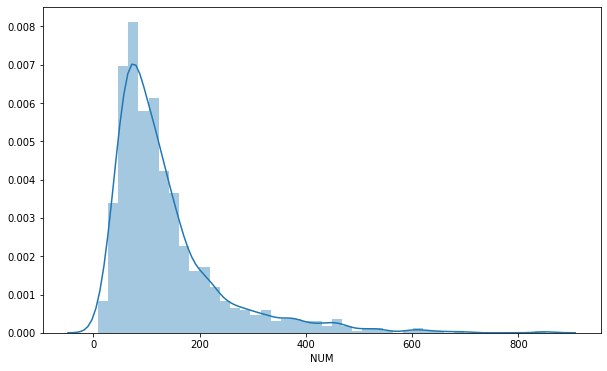

In [47]:
plot_data = data_afsnt[:].sort_values(by=['SDT_YY','SDT_MM','SDT_DD','STT'])
plot_data = plot_data.groupby(['DATE'])['NUM'].sum()
plt.figure(figsize=(10,6))
sns.distplot(plot_data)

In [ ]:
a = [0]*29+[800]
a = a*73
a = a[:875]

# 전체 기간 하루별 지연건수합
plt.figure(figsize=(30,6))
plt.plot(list(plot_data.index),plot_data,color='green',marker='o',linestyle='solid')
plt.plot(list(plot_data.index),a,linestyle='solid' )
plt.show()

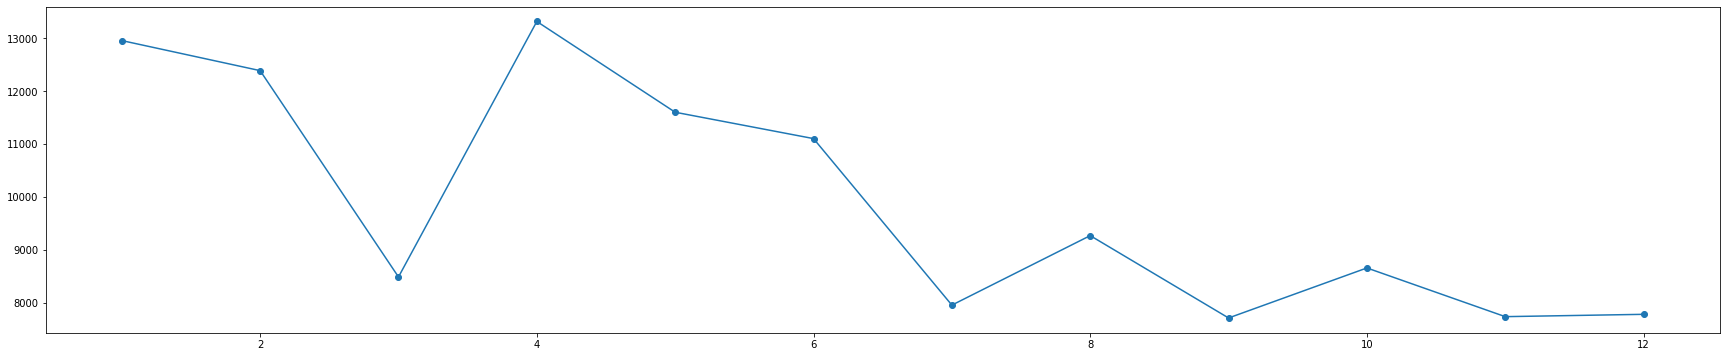

In [51]:
# 3년동안 월별 지연건수
plots_data = data_afsnt[:].sort_values(['SDT_YY','SDT_MM','SDT_DD'])
plots_data = plots_data.groupby(['SDT_MM'])['NUM'].sum()
plt.figure(figsize=(30,6))
plt.plot(list(plots_data.index),plots_data,marker='o',linestyle='solid')
plt.show()

No handles with labels found to put in legend.


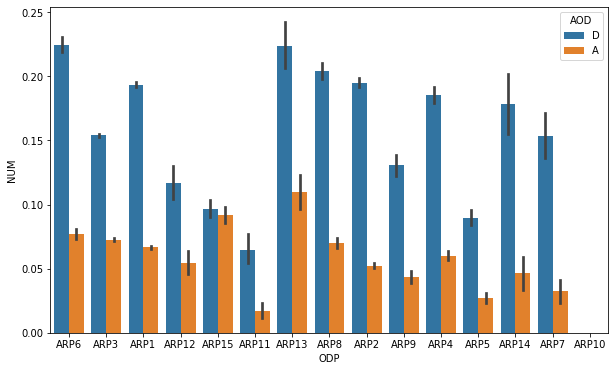

In [52]:
plt.figure(figsize=(10,6))
plt.legend(loc=1)
sns.barplot(data=data_afsnt,x='ODP',y='NUM',hue='AOD')


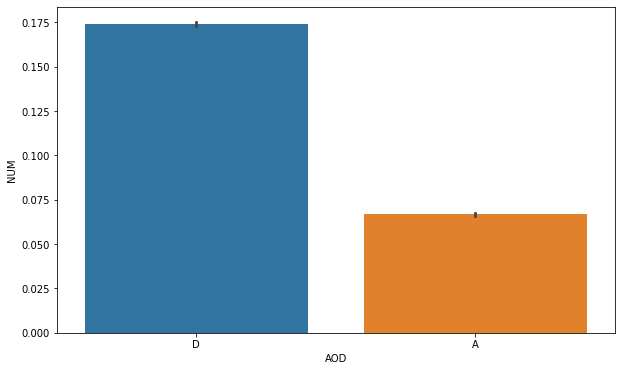

In [53]:
plt.figure(figsize=(10,6))
sns.barplot(data=data_afsnt,x='AOD',y='NUM')

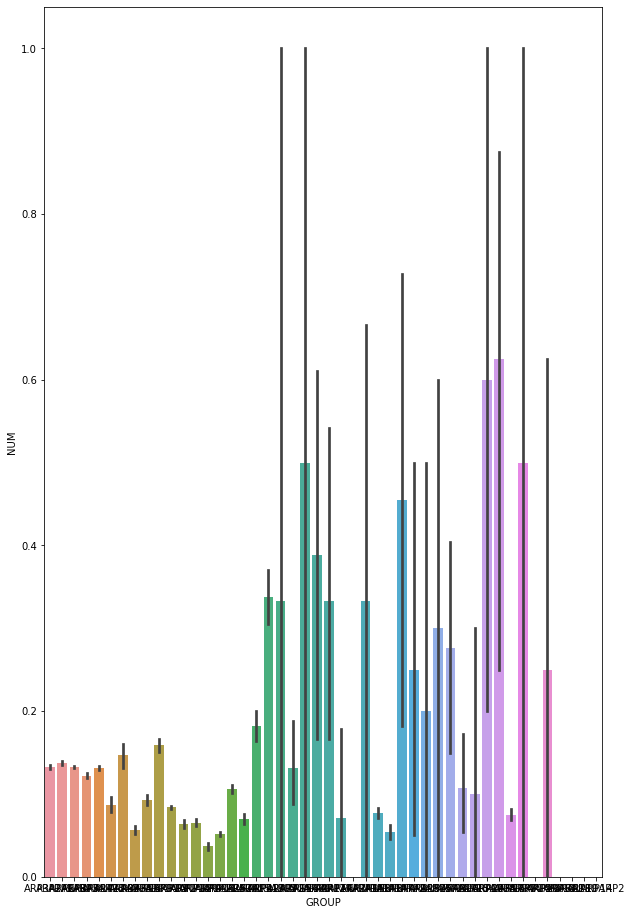

In [54]:
plt.figure(figsize=(10,16))
sns.barplot(data=data_afsnt,x='GROUP',y='NUM')

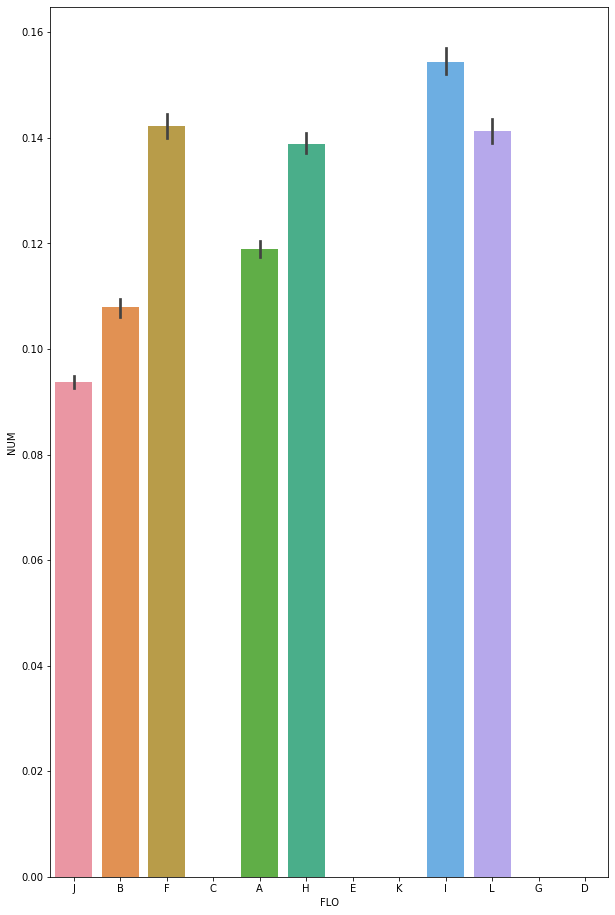

In [55]:
# G,E,C,D,K 는 부정기편이다.
plt.figure(figsize=(10,16))
sns.barplot(data=data_afsnt,x='FLO',y='NUM')

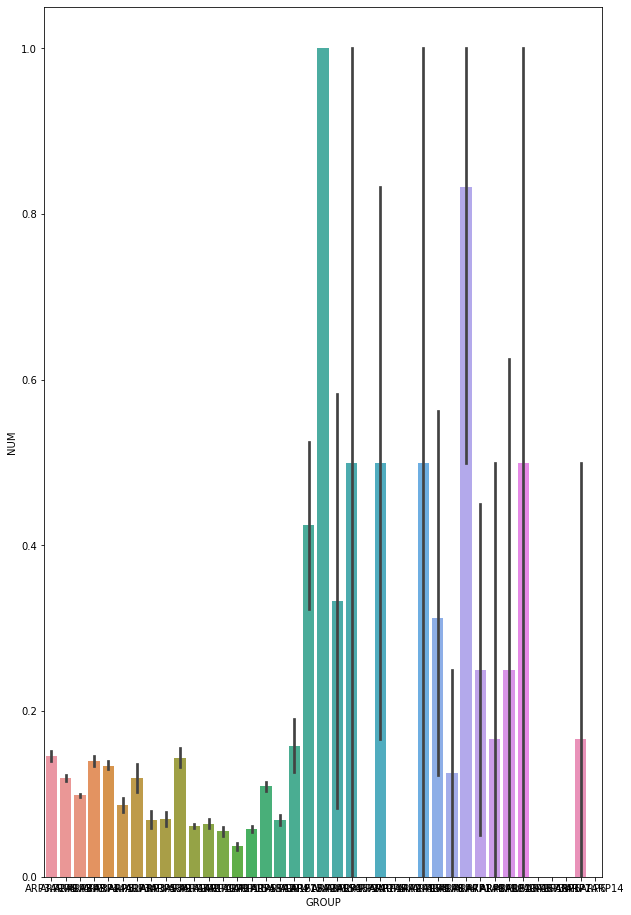

In [56]:
plt.figure(figsize=(10,16))
sns.barplot(data=data_afsnt[data_afsnt['FLO'] == 'J'],x='GROUP',y='NUM')

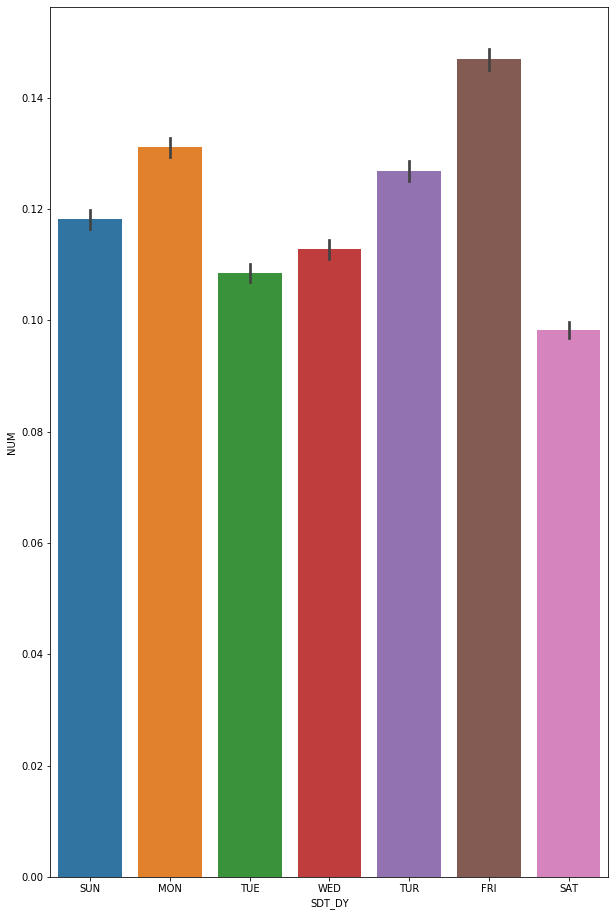

In [57]:
plt.figure(figsize=(10,16))
sns.barplot(data=data_afsnt, x='SDT_DY',y='NUM')

In [58]:
data_afsnt.groupby('SDT_DY')['NUM'].value_counts()

SDT_DY  NUM
FRI     0      121849
        1       20993
MON     0      122926
        1       18540
SAT     0      127370
        1       13867
SUN     0      126872
        1       17001
TUE     0      124080
        1       15098
TUR     0      122067
        1       17726
WED     0      123608
        1       15712
Name: NUM, dtype: int64

In [59]:
afsnt_group = list(data_afsnt['GROUP'].value_counts().index)
afsnt_flo = list(data_afsnt['FLO'].value_counts().index)
afsnt_flt = list(data_afsnt['FLT'].value_counts().index)

In [60]:
sfsnt_group = list(data_sfsnt['GROUP'].value_counts().index)
sfsnt_flo = list(data_sfsnt['FLO'].value_counts().index)

In [61]:
afsnt_dly_group = list(data_afsnt_dly['GROUP'].value_counts().index)
afsnt_dly_flo = list(data_afsnt_dly['FLO'].value_counts().index)
afsnt_dly_flt = list(data_afsnt_dly['FLT'].value_counts().index)

In [62]:
# test 데이터에는 ARP10ARP3가 있지만 train 데이터에는 ARP10ARP3가 없다.
for i in afsnt_dly_group:
    if i in afsnt_group:
        continue
    else:
        print(i,'가 없다')

ARP10ARP3 가 없다


In [63]:
# test데이터에는 FLO에 M이 있지만 train 데이터에는 M이 없다.
for i in afsnt_dly_flo:
    if i in afsnt_flo:
        continue
    else:
        print('FLO에',i,'이 없다')

FLO에 M 이 없다


In [64]:
# FLT는 M사 제외하고 J도 없긴하지만 출발항공사와 도착항공사 알기때문에 큰 문제는 되지 않을 것이다.
for i in afsnt_dly_flt:
    if i in afsnt_flt:
        continue
    else:
        print('FLT에',i,'이 없다')
data_afsnt_dly[data_afsnt_dly['FLT'] == 'J1809']

FLT에 M1363 이 없다
FLT에 M1361 이 없다
FLT에 M1351 이 없다
FLT에 M1352 이 없다
FLT에 J1809 이 없다


,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,AOD,STT,DLY,DLY_RATE,GROUP
2083,2019,9,17,TUE,ARP4,ARP3,J,J1809,A,14:05,NaN,NaN,ARP3ARP4
2084,2019,9,17,TUE,ARP3,ARP4,J,J1809,D,13:00,NaN,NaN,ARP3ARP4
9578,2019,9,24,TUE,ARP4,ARP3,J,J1809,A,14:05,NaN,NaN,ARP3ARP4
9579,2019,9,24,TUE,ARP3,ARP4,J,J1809,D,13:00,NaN,NaN,ARP3ARP4


In [66]:
data_afsnt.head(3)

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,...,ATT,DLY,DRR,CNL,CNR,NUM,HOUR,GROUP,MINUTE,DATE
0,2017,1,1,SUN,ARP3,ARP6,J,J1955,SEw3NzE4,D,...,10:32,N,NaN,N,NaN,0,10,ARP3ARP6,5,201711
1,2017,1,1,SUN,ARP3,ARP6,J,J1954,SEw3NzE4,A,...,9:31,N,NaN,N,NaN,0,9,ARP3ARP6,30,201711
2,2017,1,1,SUN,ARP3,ARP6,J,J1956,SEw3NzE4,A,...,13:03,N,NaN,N,NaN,0,12,ARP3ARP6,45,201711


In [67]:
data_sfsnt.head(3)

,SSC,FLT,ORG,DES,STD,STA,FLO,MON,TUE,WED,...,SUN,FSD,FED,IRR,GROUP,STD_HOUR,STD_MINUTE,STA_HOUR,STA_MINUTE,DISTANCE
0,S19,A1915,ARP1,ARP3,7:55,9:05,A,Y,Y,Y,...,Y,20190331,20191026,N,ARP1ARP3,7,55,9,5,70
1,S19,A1904,ARP3,ARP1,7:55,9:05,A,Y,Y,Y,...,Y,20190331,20191026,N,ARP1ARP3,7,55,9,5,70
2,S19,I1304,ARP3,ARP1,8:00,9:15,I,Y,NaN,Y,...,Y,20190331,20191026,N,ARP1ARP3,8,0,9,15,75


In [68]:
# index로 활용하기 위해서 값들을 뽑아 list로 만드는 작업
# test = data_afsnt[['ARP','ODP','FLO']]
# l = []
# for i in range(len(test)):
#     l.append(list(test.iloc[i]))
#     if i % 100000 == 0:
#         print(i)


In [69]:
import pickle
# with open('index_for_distance.pkl', 'wb') as fout:
#      pickle.dump(l, fout)
with open('index_for_distance.pkl', 'rb') as fin:
    index_for_distance = []
    index_for_distance = pickle.load(fin)


In [71]:
sfsnt_groupby = data_sfsnt.groupby(['ORG','DES','FLO'])['DISTANCE'].mean()
sfsnt_groupby_index = [list(i) for i in sfsnt_groupby.index]

[['ARP1', 'ARP11', 'J'],
 ['ARP1', 'ARP12', 'J'],
 ['ARP1', 'ARP2', 'B'],
 ['ARP1', 'ARP2', 'H'],
 ['ARP1', 'ARP2', 'J'],
 ['ARP1', 'ARP3', 'A'],
 ['ARP1', 'ARP3', 'B'],
 ['ARP1', 'ARP3', 'F'],
 ['ARP1', 'ARP3', 'H'],
 ['ARP1', 'ARP3', 'I'],
 ['ARP1', 'ARP3', 'J'],
 ['ARP1', 'ARP3', 'L'],
 ['ARP1', 'ARP4', 'B'],
 ['ARP1', 'ARP5', 'B'],
 ['ARP1', 'ARP5', 'J'],
 ['ARP1', 'ARP8', 'A'],
 ['ARP1', 'ARP9', 'A'],
 ['ARP1', 'ARP9', 'J'],
 ['ARP10', 'ARP2', 'M'],
 ['ARP10', 'ARP3', 'M'],
 ['ARP11', 'ARP1', 'J'],
 ['ARP12', 'ARP1', 'J'],
 ['ARP12', 'ARP3', 'A'],
 ['ARP12', 'ARP3', 'J'],
 ['ARP13', 'ARP3', 'F'],
 ['ARP13', 'ARP3', 'J'],
 ['ARP14', 'ARP3', 'J'],
 ['ARP15', 'ARP2', 'A'],
 ['ARP15', 'ARP2', 'J'],
 ['ARP15', 'ARP4', 'J'],
 ['ARP2', 'ARP1', 'B'],
 ['ARP2', 'ARP1', 'H'],
 ['ARP2', 'ARP1', 'J'],
 ['ARP2', 'ARP10', 'M'],
 ['ARP2', 'ARP15', 'A'],
 ['ARP2', 'ARP15', 'J'],
 ['ARP2', 'ARP3', 'A'],
 ['ARP2', 'ARP3', 'B'],
 ['ARP2', 'ARP3', 'F'],
 ['ARP2', 'ARP3', 'H'],
 ['ARP2', 'ARP3', 'I'],

In [72]:
distance = []
# a = 0
# for i in index_for_distance:
#     if i in sfsnt_groupby_index:
#         val = sfsnt_groupby[i[0],i[1],i[2]]
#         distance.append(val)
#     else:
#         distance.append(np.NaN)
#     if a % 50000 == 0:
#         print(a)
#     a = a + 1
    

In [73]:
# distance도 pickle로 저장
# with open('distance_list.pkl', 'wb') as fout:
#      pickle.dump(distance, fout)
with open('distance_list.pkl', 'rb') as fin:
    distance = []
    distance = pickle.load(fin)
distance1 = distance[:]

In [74]:
data_afsnt['DISTANCE'] = distance
data_afsnt['FLIGHT_MEAN'] = distance1

In [75]:
data_afsnt[data_afsnt['DISTANCE'].isna() == True][['SDT_YY','SDT_MM','SDT_DD','ARP','ODP','FLO','REG','AOD','STT','GROUP','DISTANCE']].head(3)

,SDT_YY,SDT_MM,SDT_DD,ARP,ODP,FLO,REG,AOD,STT,GROUP,DISTANCE
511,2017,1,2,ARP1,ARP15,J,SEw3NDYw,D,6:20,ARP1ARP15,NaN
512,2017,1,2,ARP1,ARP15,J,SEw3NzY1,A,8:15,ARP1ARP15,NaN
3783,2017,1,13,ARP1,ARP15,J,SEw3NzE0,A,7:45,ARP1ARP15,NaN


In [76]:
data_afsnt['GROUP'].value_counts()

ARP1ARP3      446533
ARP2ARP3      116679
ARP1ARP2      105403
ARP3ARP6       68716
ARP3ARP8       58584
ARP3ARP4       57033
ARP1ARP5       25107
ARP15ARP2      20249
ARP1ARP9       15276
ARP3ARP9       10238
ARP13ARP3       8488
ARP1ARP8        7771
ARP3ARP5        7512
ARP1ARP11       7311
ARP1ARP12       7296
ARP15ARP4       7134
ARP3ARP7        6238
ARP14ARP3       3788
ARP1ARP4        2794
ARP12ARP3       2458
ARP1ARP15       1834
ARP15ARP3        769
ARP2ARP4         160
ARP1ARP6          93
ARP15ARP6         47
ARP1ARP7          28
ARP2ARP6          24
ARP7ARP8          20
ARP15ARP7         18
ARP4ARP6          17
ARP1ARP1          11
ARP2ARP5          10
ARP1ARP10         10
ARP15ARP5         10
ARP2ARP7           8
ARP1ARP13          8
ARP10ARP15         7
ARP2ARP8           6
ARP15ARP8          5
ARP1ARP14          4
ARP12ARP15         3
ARP6ARP9           2
ARP15ARP9          2
ARP2ARP9           2
ARP10ARP2          2
ARP14ARP15         1
Name: GROUP, dtype: int64

In [77]:
data_afsnt[data_afsnt['GROUP'] == 'ARP2ARP3'][['SDT_YY','SDT_MM','SDT_DD','FLO','REG','ARP','ODP','AOD','STT','ATT','GROUP','DISTANCE']].sort_values(by=['FLO','SDT_YY','SDT_MM','SDT_DD','REG','STT']).head(5)

,SDT_YY,SDT_MM,SDT_DD,FLO,REG,ARP,ODP,AOD,STT,ATT,GROUP,DISTANCE
200273,2017,1,1,A,SEw3NzY5,ARP2,ARP3,D,15:05,15:20,ARP2ARP3,61.666667
200448,2017,1,1,A,SEw3NzY5,ARP3,ARP2,A,15:55,16:05,ARP2ARP3,58.333333
200449,2017,1,1,A,SEw3NzY5,ARP3,ARP2,D,17:20,17:38,ARP2ARP3,58.333333
200274,2017,1,1,A,SEw3NzY5,ARP2,ARP3,A,18:10,18:11,ARP2ARP3,61.666667
200279,2017,1,1,A,SEw3NzY5,ARP2,ARP3,D,18:40,18:57,ARP2ARP3,61.666667
200451,2017,1,1,A,SEw3NzY5,ARP3,ARP2,A,19:30,19:39,ARP2ARP3,58.333333
200450,2017,1,1,A,SEw3NzY5,ARP3,ARP2,D,20:15,20:31,ARP2ARP3,58.333333
200278,2017,1,1,A,SEw3NzY5,ARP2,ARP3,A,21:05,21:14,ARP2ARP3,61.666667
200345,2017,1,1,A,SEw3Nzkw,ARP2,ARP3,D,8:30,8:45,ARP2ARP3,61.666667
200453,2017,1,1,A,SEw3Nzkw,ARP3,ARP2,A,9:20,9:24,ARP2ARP3,58.333333


In [ ]:
test_cor_data = data_afsnt[:]
test_cor_data.info()
test_cor_data = test_cor_data.fillna('blank')
def Label_encoder(lis):
    features = ['SDT_DY','ARP','ODP','FLO','FLT','REG','AOD','IRR','DLY','DRR','CNL','CNR','GROUP']
    for i in features:
        le = LabelEncoder()
        le = le.fit(lis[i])
        lis[i] = le.transform(lis[i])
    return lis
test_cor_data = Label_encoder(test_cor_data)
test_cor_data.info()

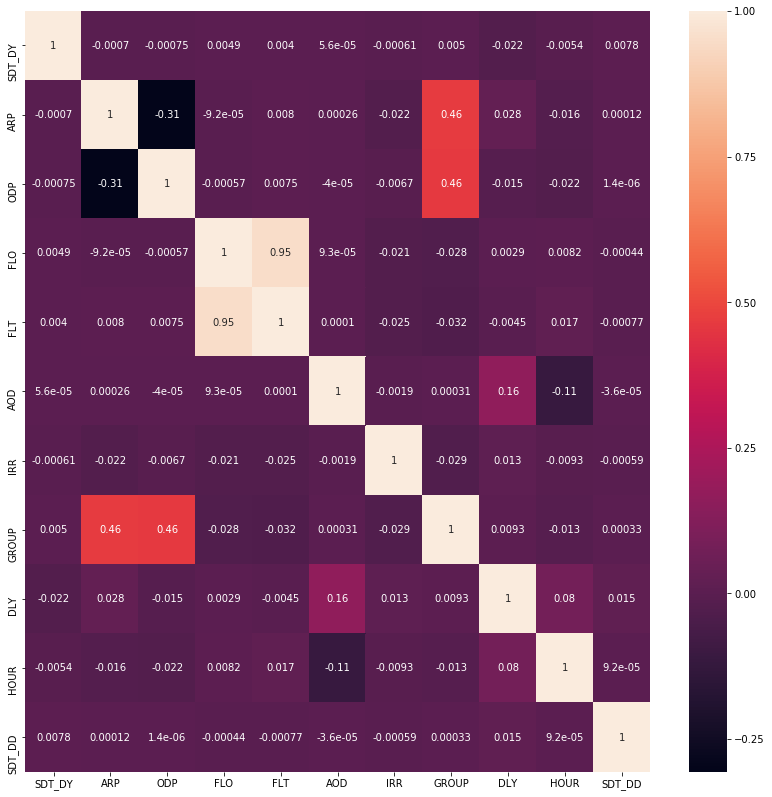

In [79]:
feat = test_cor_data[['SDT_DY','ARP','ODP','FLO','FLT','AOD','IRR','GROUP','DLY','HOUR','SDT_DD','DISTANCE']]
corr = feat.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True)

# 비행시간 구하기

# distance 구하기

In [80]:
j_15_3 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP15ARP3'].index)
for i in j_15_3:
    distance[i] = 65
data_afsnt['DISTANCE'] = distance

In [81]:
j_1_12 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP1ARP12'].index)
for i in j_1_12:
    distance[i] = 60
data_afsnt['DISTANCE'] = distance

In [82]:
j_1_5 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP1ARP5'].index)
for i in j_1_5:
    distance[i] = 55
data_afsnt['DISTANCE'] = distance

In [83]:
j_1_2 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP1ARP2'].index)
for i in j_1_2:
    distance[i] = 55
data_afsnt['DISTANCE'] = distance

In [84]:
j_3_5 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP3ARP5'].index)
for i in j_3_5:
    distance[i] = 60
data_afsnt['DISTANCE'] = distance

In [85]:
j_15_2 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP15ARP2'].index)
for i in j_15_2:
    distance[i] = 65
data_afsnt['DISTANCE'] = distance

In [86]:
j_2_4 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP2ARP4'].index)
for i in j_2_4:
    distance[i] = 45
data_afsnt['DISTANCE'] = distance

In [87]:
j_3_7 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP3ARP7'].index)
for i in j_3_7:
    distance[i] = 50
data_afsnt['DISTANCE'] = distance

In [88]:
j_1_6 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP1ARP6'].index)
for i in j_1_6:
    distance[i] = 40
data_afsnt['DISTANCE'] = distance

In [89]:
j_15_4 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP15ARP4'].index)
for i in j_15_4:
    distance[i] = 60
data_afsnt['DISTANCE'] = distance

In [90]:
j_1_8 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP1ARP8'].index)
for i in j_1_8:
    distance[i] = 50
data_afsnt['DISTANCE'] = distance

In [91]:
j_1_4 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP1ARP4'].index)
for i in j_1_4:
    distance[i] = 50
data_afsnt['DISTANCE'] = distance

In [92]:
j_15_6 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP15ARP6'].index)
for i in j_15_6:
    distance[i] = 45
data_afsnt['DISTANCE'] = distance

In [93]:
j_1_7 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP1ARP7'].index)
for i in j_1_7:
    distance[i] = 60
data_afsnt['DISTANCE'] = distance

In [94]:
j_2_6 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP2ARP6'].index)
for i in j_2_6:
    distance[i] = 50
data_afsnt['DISTANCE'] = distance

In [95]:
j_7_8 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP7ARP8'].index)
for i in j_7_8:
    distance[i] = 50
data_afsnt['DISTANCE'] = distance

In [96]:
j_15_7 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP15ARP7'].index)
for i in j_15_7:
    distance[i] = 55
data_afsnt['DISTANCE'] = distance

In [97]:
j_4_6 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP4ARP6'].index)
for i in j_4_6:
    distance[i] = 50
data_afsnt['DISTANCE'] = distance

In [98]:
j_1_1 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP1ARP1'].index)
for i in j_1_1:
    distance[i] = 120
data_afsnt['DISTANCE'] = distance

In [99]:
j_15_5 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP15ARP5'].index)
for i in j_15_5:
    distance[i] = 175
data_afsnt['DISTANCE'] = distance

In [100]:
j_2_5 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP2ARP5'].index)
for i in j_2_5:
    distance[i] = 50
data_afsnt['DISTANCE'] = distance

In [101]:
j_1_10 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP1ARP10'].index)
for i in j_1_10:
    distance[i] = 53
data_afsnt['DISTANCE'] = distance

In [102]:
j_1_13 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP1ARP13'].index)
for i in j_1_13:
    distance[i] = 41.25
data_afsnt['DISTANCE'] = distance

In [103]:
j_2_7 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP2ARP7'].index)
for i in j_2_7:
    distance[i] = 46.25
data_afsnt['DISTANCE'] = distance

In [104]:
j_2_8 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP2ARP8'].index)
for i in j_2_8:
    distance[i] = 46.6
data_afsnt['DISTANCE'] = distance

In [105]:
j_1_14 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP1ARP14'].index)
for i in j_1_14:
    distance[i] = 35
data_afsnt['DISTANCE'] = distance

In [106]:
j_6_9 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP6ARP9'].index)
for i in j_6_9:
    distance[i] = 150
data_afsnt['DISTANCE'] = distance

In [107]:
j_2_9 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP2ARP9'].index)
for i in j_2_9:
    distance[i] = 40
data_afsnt['DISTANCE'] = distance

In [108]:
j_10_2 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP10ARP2'].index)
for i in j_10_2:
    distance[i] = 60
data_afsnt['DISTANCE'] = distance

In [109]:
data_afsnt['DISTANCE'] = data_afsnt['DISTANCE'].fillna(data_afsnt['DISTANCE'].mean())
data_afsnt.head(3)

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,...,DRR,CNL,CNR,NUM,HOUR,GROUP,MINUTE,DATE,DISTANCE,FLIGHT_MEAN
0,2017,1,1,SUN,ARP3,ARP6,J,J1955,SEw3NzE4,D,...,NaN,N,NaN,0,10,ARP3ARP6,5,201711,65.833333,65.833333
1,2017,1,1,SUN,ARP3,ARP6,J,J1954,SEw3NzE4,A,...,NaN,N,NaN,0,9,ARP3ARP6,30,201711,65.833333,65.833333
2,2017,1,1,SUN,ARP3,ARP6,J,J1956,SEw3NzE4,A,...,NaN,N,NaN,0,12,ARP3ARP6,45,201711,65.833333,65.833333


In [110]:
import pickle
# with open('late.pkl', 'wb') as fout:
#      pickle.dump(late, fout)
with open('late.pkl', 'rb') as fin:
    late = []
    late = pickle.load(fin)


In [111]:
data_afsnt['FLO_LATE_TIME'] = late['FLO_TIME']

In [135]:
temp = data_afsnt[:]
def drop_features(df):
    temps = df.drop(['SDT_YY','DATE','FLIGHT_MEAN','GROUP','NUM','SDT_DD','REG','MINUTE','FLT','IRR','STT','ATT','DRR','CNL','CNR'],axis = 1, inplace = False)
    return temps
temps = drop_features(temp)
temps.head(3)

,SDT_MM,SDT_DY,ARP,ODP,FLO,AOD,DLY,HOUR,DISTANCE,FLO_LATE_TIME
0,1,SUN,ARP3,ARP6,J,D,N,10,65.833333,0.364749
1,1,SUN,ARP3,ARP6,J,A,N,9,65.833333,0.030233
2,1,SUN,ARP3,ARP6,J,A,N,12,65.833333,0.030233


In [136]:
from sklearn.preprocessing import LabelEncoder
def encode_features(dataDF):
    features = ['SDT_DY','ARP','FLO','AOD','DLY','ODP']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF

temps = encode_features(temps)
temps['DISTANCE'] = temps['DISTANCE'].apply(lambda x : (x-35)/140)
temps.head(3)

,SDT_MM,SDT_DY,ARP,ODP,FLO,AOD,DLY,HOUR,DISTANCE,FLO_LATE_TIME
0,1,3,8,11,9,1,0,10,0.220238,0.364749
1,1,3,8,11,9,0,0,9,0.220238,0.030233
2,1,3,8,11,9,0,0,12,0.220238,0.030233


In [137]:
# test train 데이터 나누기 838468
y = temps['DLY']
x = temps.drop('DLY',axis = 1)
X_train = x[:838468]
X_test = x[838468:]
y_train = y[:838468]
y_test = y[838468:]

In [138]:
# over_sampling
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_over, y_train_over = smote.fit_sample(X_train,y_train)
print(X_train.shape,y_train.shape)
print(X_train_over.shape,y_train_over.shape)
print(pd.Series(y_train_over).value_counts())

(838468, 9) (838468,)
(1470688, 9) (1470688,)
1    735344
0    735344
dtype: int64


In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error


# 결정트리, random forest, 로지스틱 회귀
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()

#DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train,y_train)
dt_pred1 = dt_clf.predict(X_test)
print('DecisionTree1 정확도: ', accuracy_score(y_test,dt_pred1))

dt_clf.fit(X_train_over,y_train_over)
dt_pred2 = dt_clf.predict(X_test)
print('DecisionTree2 정확도: ', accuracy_score(y_test,dt_pred2))

#RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train_over,y_train_over)
rf_pred = rf_clf.predict(X_test)
print('RandomForest 정확도: ', accuracy_score(y_test,rf_pred))

#LogisticRegression 학습/예측/평가
lr_clf.fit(X_train_over,y_train_over)
lr_pred= lr_clf.predict(X_test)
print('Logist 정확도: ', accuracy_score(y_test,lr_pred))


DecisionTree1 정확도:  0.880689622824827
DecisionTree2 정확도:  0.78226492719829


C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForest 정확도:  0.7790553534216469


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logist 정확도:  0.6020865579833959


In [140]:
# 오차행렬
from sklearn.metrics import confusion_matrix
cm  = confusion_matrix(y_test, dt_pred1)
print('decision_tree:\n', cm)
cm  = confusion_matrix(y_test, dt_pred2)
print('decision_tree:\n', cm)
cm  = confusion_matrix(y_test, rf_pred)
print('random_forest:\n', cm)
cm  = confusion_matrix(y_test, lr_pred)
print('logistic:\n', cm)


decision_tree:
 [[129857   3571]
 [ 14235   1578]]
decision_tree:
 [[110555  22873]
 [  9622   6191]]
random_forest:
 [[109933  23495]
 [  9479   6334]]
logistic:
 [[78562 54866]
 [ 4519 11294]]


In [144]:
print('Feature importance:\n{0}'.format(dt_clf.feature_importances_))
print('Feature importance:\n{0}'.format(rf_clf.feature_importances_))
print('Feature importance:\n{0}'.format(lr_clf.coef_))

Feature importance:
[0.25780862 0.20394534 0.02666838 0.01882897 0.0306692  0.13097165
 0.20576573 0.04033094 0.08501116]
Feature importance:
[0.27954192 0.2133624  0.0179619  0.01803338 0.02667119 0.07963957
 0.22423757 0.03361565 0.10693642]
Feature importance:
[[-0.01057765 -0.03900064  0.01934503  0.00281103 -0.01414482  0.54067128
   0.07747166  1.31705784  2.28006621]]


In [145]:
# 평가함수, ROC커브 함수
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,f1_score,roc_curve


def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:4f}, 정밀도: {1:4f}, 재현율: {2:4f}'.format(accuracy,precision,recall))
    print('f1스코어: {0:4f}'.format(f1))

def roc_curve_plot(y_test,pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test,pred_proba_c1)
    plt.plot(fprs,tprs,label = 'ROC')
    #가운데 대각선 직선
    plt.plot([0,1],[0,1],'k--',label = 'Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-sensitivity)'); plt.ylabel('TPR(recall)')
    plt.legend()

In [146]:
# 평가하기
get_clf_eval(y_test,dt_pred1)
get_clf_eval(y_test,dt_pred2)
get_clf_eval(y_test,rf_pred)
get_clf_eval(y_test,lr_pred)
# get_clf_eval(y_test,preds_xg)

오차행렬
[[129857   3571]
 [ 14235   1578]]
정확도: 0.880690, 정밀도: 0.306467, 재현율: 0.099791
f1스코어: 0.150558
오차행렬
[[110555  22873]
 [  9622   6191]]
정확도: 0.782265, 정밀도: 0.213013, 재현율: 0.391513
f1스코어: 0.275910
오차행렬
[[109933  23495]
 [  9479   6334]]
정확도: 0.779055, 정밀도: 0.212344, 재현율: 0.400557
f1스코어: 0.277551
오차행렬
[[78562 54866]
 [ 4519 11294]]
정확도: 0.602087, 정밀도: 0.170707, 재현율: 0.714222
f1스코어: 0.275554
